## Linear Regression

**Agenda**
 - Handling numerical and categorical features
 - Pre-process for linear regression model
 - Implementing Linear Regression model using statsmodel 
 - Eliminating features with no significance
 - Implementing Linear Regression model using sklearn
 - Check assumptions of Linear regression model
 - Implementing polynomial regression model
 
 
 
### Problem Statement : Predict the healthcare charges based on the personal characteristics

### Dataset :

 - age
 - sex
 - bmi
 - children
 - smoker
 - region
 - charges
 


<a href="https://www.kaggle.com/mirichoi0218/insurance">Download Dataset</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# load and preview the dataset

data = pd.read_csv("insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# list of independent and dependent variables

x_cols = ['age','sex','bmi','children','smoker','region']
y_cols = ['charges']

In [5]:
# let us now convert the nominal/categorical variables to numeric

from sklearn.preprocessing import LabelEncoder

# encode the sex feature
le = LabelEncoder()
le.fit(data['sex'])
data['sex'] = le.transform(data['sex'])

# encode the smoker feature
le = LabelEncoder()
le.fit(data['smoker'])
data['smoker'] = le.transform(data['smoker'])

# encode the region feature
le = LabelEncoder()
le.fit(data['region'])
data['region'] = le.transform(data['region'])



In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
# alternate way for label encoding

#data.sex = data.sex.map({'male':0,'female':1})
#data.head()

### Explore the data

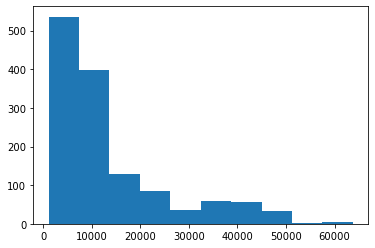

In [8]:
# distribution of healthcare charges

plt.hist(data['charges'])
plt.show()

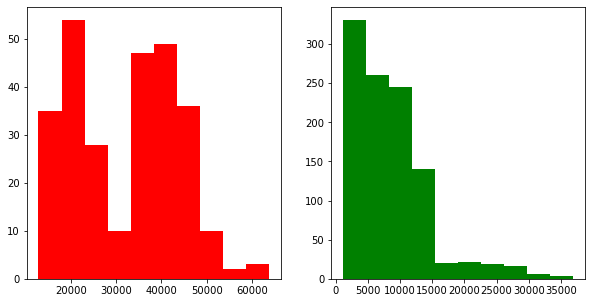

In [9]:
# distribution of charges as per the smoking preference

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(data[(data['smoker'] == 1)]['charges'],color="red")

plt.subplot(122)
plt.hist(data[(data['smoker'] == 0)]['charges'],color="green")
plt.show()

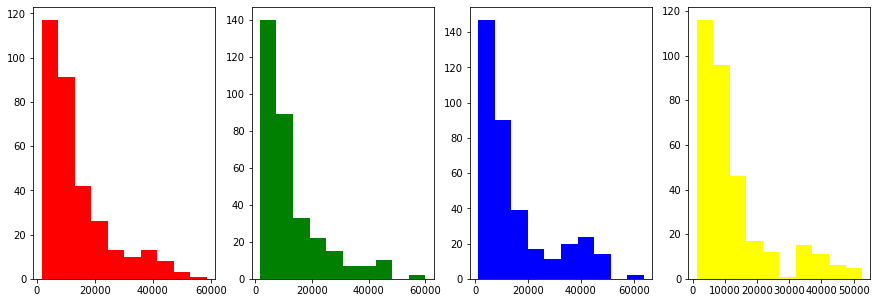

In [10]:
# distribution of charges as per the region

plt.figure(figsize=(15,5))
plt.subplot(141)
plt.hist(data[(data['region'] == 0)]['charges'],color="red")

plt.subplot(142)
plt.hist(data[(data['region'] == 1)]['charges'],color="green")

plt.subplot(143)
plt.hist(data[(data['region'] ==2)]['charges'],color="blue")

plt.subplot(144)
plt.hist(data[(data['region'] == 3)]['charges'],color="yellow")
plt.show()


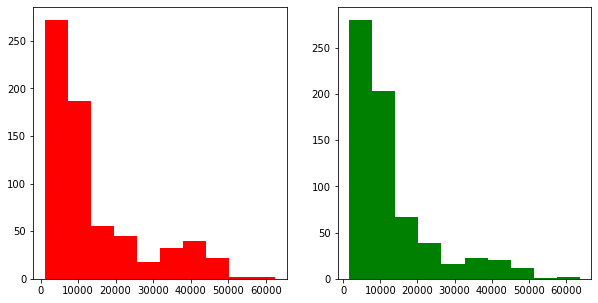

In [11]:
# distribution of charges as per gender

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(data[(data['sex'] == 1)]['charges'],color="red")

plt.subplot(122)
plt.hist(data[(data['sex'] == 0)]['charges'],color="green")
plt.show()


## Assumptions of Linear Regression

### 1. Multicollinearlity in independent variables
 - Refers to extent to which the independent variables are correlated with each other
 - Multicollinearity amongst the independent variables will affect the estimation of the parameter and the explanability from the independent variables
 - Can be treated by removing one of the two highly correlated independent variables
 
Read: https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a
 

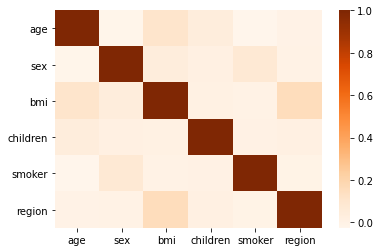

In [12]:
# check correlation between the independent variables using heatmap


sns.heatmap(data[x_cols].corr(),cmap='Oranges')

In [13]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(data[x_cols].values, i) for i in range(data[x_cols].shape[1])]
vif["features"] = data[x_cols].columns

vif

,VIF Factor,features
0,7.551348,age
1,2.001061,sex
2,10.371829,bmi
3,1.801245,children
4,1.256837,smoker
5,2.924528,region


In [14]:
# remove feature with highest vif and check again

x_cols = ['age','sex','children','smoker','region']

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(data[x_cols].values, i) for i in range(data[x_cols].shape[1])]
vif["features"] = data[x_cols].columns

vif

,VIF Factor,features
0,3.382154,age
1,1.870078,sex
2,1.749297,children
3,1.240937,smoker
4,2.466704,region


### 2. Linearity of the relation
 - The relationship between the independent and dependent variables should be linear

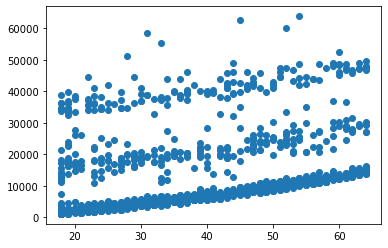

In [15]:
# linearity of variables using pairplots

plt.scatter(data['age'],data['charges'])


## Fit the linear regression model to the data

$$ charges = \theta_0  \cdot 1+ \theta_1 \cdot age + \theta_2 \cdot sex + \theta_3 \cdot children + \theta_4 \cdot smoker + \theta_5 \cdot region $$

In [16]:
# create X and y variables
x_cols = ['age','sex','children','smoker','region']

X = data[x_cols].copy()
y = data[y_cols].copy()


# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state = 33) 

### Scaling the continuous features using standard scaler

$$ scaled \ X = \frac{X-\bar{X}}{\sigma_x}$$

In [17]:
# scale all the features

from sklearn.preprocessing import StandardScaler


X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
scaler.fit(X_train['age'].values.reshape(-1,1))

X_train_scaled['age'] = scaler.transform(X_train['age'].values.reshape(-1,1))
X_test_scaled['age'] = scaler.transform(X_test['age'].values.reshape(-1,1))

# add constant to the scaled variables


In [18]:
# add constant
X_train_scaled_constant = sm.add_constant(X_train_scaled)
X_test_scaled_constant = sm.add_constant(X_test_scaled)

In [19]:
# fit the linear regression model using sm.OLS

model = sm.OLS(y_train,X_train_scaled_constant).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     527.2
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          6.01e-277
Time:                        19:33:27   Log-Likelihood:                -10211.
No. Observations:                1003   AIC:                         2.043e+04
Df Residuals:                     997   BIC:                         2.046e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8041.3280    448.365     17.935      0.0

In [20]:
# remove the insignificant columns and fit the model again

insignificant_cols = ['sex','region']

model = sm.OLS(y_train,X_train_scaled_constant.drop(columns=insignificant_cols)).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     878.6
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          1.42e-279
Time:                        19:33:28   Log-Likelihood:                -10212.
No. Observations:                1003   AIC:                         2.043e+04
Df Residuals:                     999   BIC:                         2.045e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7629.9622    292.286     26.104      0.0

$$ charges = 7629 +  3780 \cdot age + 599 \cdot children + 2391 \cdot smoker$$

In [21]:
# fit a model using sklearn

lr = LinearRegression()
lr.fit(X_train_scaled.drop(columns=insignificant_cols),y_train)


LinearRegression()

In [22]:
# print the intercept and the coefficients of the linear regression model
print(lr.coef_)
print(lr.intercept_)


[[ 3780.91878936   599.21508865 23905.34101448]]
[7629.96220743]


In [23]:
y_pred = lr.predict(X_test_scaled.drop(columns=insignificant_cols))

r2_score(y_pred,y_test)


0.615288294202258

### 3. Mean of residuals

In [24]:
# mean of residuals should be zero (train set)

y_train_pred = lr.predict(X_train_scaled.drop(columns=insignificant_cols))

residuals = y_train_pred - y_train

print(np.mean(residuals))

charges   -4.869378e-13
dtype: float64


### 4. Homoscedasticity

<img src="https://www.researchgate.net/profile/Akhmad_Fauzy/publication/319091775/figure/fig2/AS:526826008846336@1502616516067/Example-of-homoscedasticity-Ideally-residuals-are-randomly-scattered-around-0-the.png">

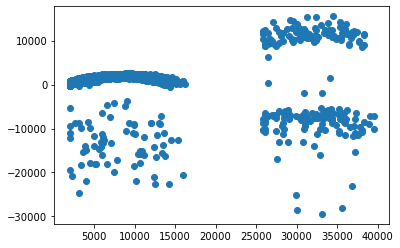

In [25]:
# scatter plot of predicted values vs residuals

plt.scatter(y_train_pred, residuals)


### 5. Normality of residuals

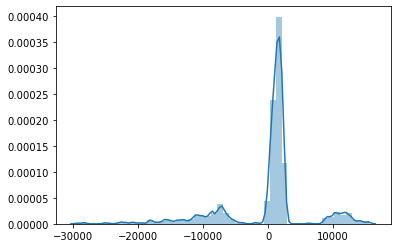

In [26]:
# distribution plot of residuals

sns.distplot(residuals, kde = True)

In [27]:
# normality test

from scipy.stats import normaltest
normaltest(residuals)

NormaltestResult(statistic=array([208.53881014]), pvalue=array([5.20442492e-46]))

### 6. Autocorrelation

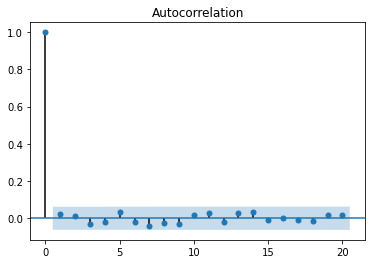

In [28]:
# autocorrelation

sm.graphics.tsa.plot_acf(residuals,lags=20)
plt.show()

### Polynomial regression

In [29]:
# create X and y variables
from sklearn.preprocessing import PolynomialFeatures

X = data[x_cols].copy()
y = data[y_cols].copy()

# log transform

quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)


y_log = np.log(y)

# split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_quad, y_log, test_size=0.25, random_state=33)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# fit a model using sklearn

lr_poly = LinearRegression()
lr_poly.fit(X_train_scaled, y_train)


LinearRegression()

In [32]:
y_pred_test = lr_poly.predict(X_test_scaled)
r2_score(y_test,y_pred_test)

0.805782384560331

In [33]:
lr_poly.intercept_

array([9.09895742])

In [34]:
lr_poly.coef_

array([[ 0.        ,  0.70702616, -0.06986465,  0.44227305,  0.53153256,
        -0.26926847, -0.18488667,  0.07661971, -0.20131096, -0.51296079,
         0.16852314, -0.06986465,  0.01602922,  0.05896884,  0.00327006,
        -0.09139029, -0.09244166, -0.0416245 ,  0.53153256,  0.09062281,
         0.06611881]])